In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('spam_or_not_spam.csv')
# displaying the first five rows of the dataframe
df.head() 

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [4]:
df['email'].isnull().sum()

1

In [5]:
df['email'].fillna(method = 'ffill', inplace = True)
df['email'].isnull().sum()

0

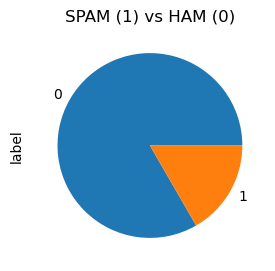

In [6]:
plt.figure(figsize=(3,3))
spam_ham = pd.value_counts(df['label'],sort = True)
spam_ham.plot(kind = 'pie')
plt.title('SPAM (1) vs HAM (0)')
plt.show()

In [7]:
X = df.email
y = df.label

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [9]:
# CountVectorizer() randomly assigns number to each words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [10]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [11]:
y_pred = model.predict(X_test)

In [12]:
# ACCURACY
print(model.score(X_test, y_test))

0.9166666666666666


In [13]:
# Classification Report
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       487
           1       1.00      0.56      0.72       113

    accuracy                           0.92       600
   macro avg       0.95      0.78      0.83       600
weighted avg       0.92      0.92      0.91       600



[[487   0]
 [ 50  63]]


<AxesSubplot:title={'center':'Confusion Matrix Visualization'}>

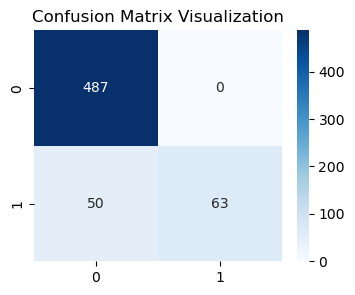

In [14]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)
plt.figure(figsize=(4,3))
plt.title('Confusion Matrix Visualization')
sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')